### Question 1

In [7]:
import pandas as pd
import numpy as np

# Step 2: Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Step 4: Mean age per occupation
mean_age_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Male ratio per occupation
gender_count = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_count['Male_ratio'] = gender_count['M'] / (gender_count['M'] + gender_count['F'])
male_ratio_sorted = gender_count['Male_ratio'].sort_values(ascending=False)

# Step 6: Minimum and maximum ages per occupation
min_max_age = users.groupby('occupation')['age'].agg(['min','max'])

# Step 7: Mean age for each combination of occupation and sex
mean_age_occ_sex = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8: Percentage of women and men per occupation
gender_count['Total'] = gender_count['M'] + gender_count['F']
gender_count['%Female'] = (gender_count['F'] / gender_count['Total'])*100
gender_count['%Male'] = (gender_count['M'] / gender_count['Total'])*100
percentages = gender_count[['%Female','%Male']]

print("Mean age per occupation:\n", mean_age_occupation)
print("\nMale ratio per occupation (sorted):\n", male_ratio_sorted)
print("\nMin and Max age per occupation:\n", min_max_age)
print("\nMean age per occupation and gender:\n", mean_age_occ_sex)
print("\nPercentage of female and male per occupation:\n", percentages)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other    

### Question 2


In [17]:
import pandas as pd

# Import the dataset from the given URL
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

# Step 4: Select only the Goals column
goals = euro12['Goals']

# Step 5: How many teams participated in the Euro2012?
num_teams = euro12.shape[0]

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Step 7: View only the columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team','Yellow Cards','Red Cards']]

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
sorted_teams = discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=[False, False])

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow = discipline['Yellow Cards'].mean()

# Step 10: Filter teams that scored more than 6 goals
more_than_6 = euro12[euro12['Goals'] > 6]

# Step 11: Select the teams that start with 'G'
teams_start_g = euro12[euro12['Team'].str.startswith('G')]

# Step 12: Select the first 7 columns
first_7_cols = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3
except_last_3 = euro12.iloc[:, :-3]

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected = euro12.loc[euro12['Team'].isin(['England','Italy','Russia']), ['Team','Shooting Accuracy']]

print("Goals column:\n", goals)
print("\nNumber of teams:", num_teams)
print("Number of columns:", num_columns)
print("\nDiscipline DataFrame:\n", discipline.head())
print("\nTeams sorted by Red, then Yellow Cards:\n", sorted_teams)
print("\nMean Yellow Cards:", mean_yellow)
print("\nTeams with more than 6 goals:\n", more_than_6)
print("\nTeams that start with 'G':\n", teams_start_g)
print("\nFirst 7 columns:\n", first_7_cols.head())
print("\nAll columns except last 3:\n", except_last_3.head())
print("\nShooting Accuracy (England, Italy, Russia):\n", shooting_accuracy_selected)

Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams: 16
Number of columns: 35

Discipline DataFrame:
              Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0

Teams sorted by Red, then Yellow Cards:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14     

### Question 3

In [19]:
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
s1 = pd.Series(np.random.randint(1,5,100))
s2 = pd.Series(np.random.randint(1,4,100))
s3 = pd.Series(np.random.randint(10000,30001,100))

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1)

# Step 4: Change the column names
df.columns = ['bedrs','bathrs','price_sqr_meter']

# Step 5: Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([s1, s2, s3], axis=0).to_frame()

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

print("DataFrame df:\n", df.head())
print("\nOne column DataFrame bigcolumn:\n", bigcolumn.head(310))

DataFrame df:
    bedrs  bathrs  price_sqr_meter
0      4       1            26075
1      4       3            17277
2      3       2            20884
3      3       3            15774
4      3       2            23556

One column DataFrame bigcolumn:
          0
0        4
1        4
2        3
3        3
4        3
..     ...
295  11036
296  19818
297  22066
298  15644
299  18307

[300 rows x 1 columns]


### Question 4

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np

# File path
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\wind.txt'

# Load the dataset, skipping the header row
data = pd.read_csv(file_path, delim_whitespace=True)
data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 
                'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

# Combine Yr, Mo, and Dy into a single Date column
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d', errors='coerce')

# Drop the Yr, Mo, and Dy columns
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Handle missing values
missing_values = data.isna().sum()
print("\nMissing values per location:")
print(missing_values)

# Total non-missing values
non_missing_total = data.notna().sum().sum()
print("\nTotal non-missing values:", non_missing_total)

# Calculate mean windspeed over all locations and times
mean_wind_speed = data.mean().mean()
print("\nMean wind speed over all locations and times:", mean_wind_speed)

# Statistics by location
loc_stats = data.describe().T
print("\nStatistics by location (min, max, mean, std):")
print(loc_stats[['min', 'max', 'mean', 'std']])

# Day-wise statistics
day_stats = data.T.describe().T[['min', 'max', 'mean', 'std']]
print("\nDay-wise statistics (min, max, mean, std):")
print(day_stats)

# Average wind speed in January
january_avg = data[data.index.month == 1].mean()
print("\nAverage wind speed in January for each location:")
print(january_avg)

# Downsample the data to yearly, monthly, and weekly averages
yearly_avg = data.resample('Y').mean()
print("\nYearly average wind speed:")
print(yearly_avg)

monthly_avg = data.resample('M').mean()
print("\nMonthly average wind speed:")
print(monthly_avg)

weekly_avg = data.resample('W').mean()
print("\nWeekly average wind speed:")
print(weekly_avg)

# Weekly statistics for the first 52 weeks
weekly_stats = weekly_avg.head(52).describe()
print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats)

# Save outputs to CSV files
loc_stats[['min', 'max', 'mean', 'std']].to_csv('location_statistics.csv')
day_stats.to_csv('day_statistics.csv')
yearly_avg.to_csv('yearly_average.csv')
monthly_avg.to_csv('monthly_average.csv')
weekly_avg.to_csv('weekly_average.csv')

C:\Users\thako\AppData\Local\Temp\ipykernel_19640\2879066461.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)



Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Mean wind speed over all locations and times: 10.227982360836938

Statistics by location (min, max, mean, std):
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day-wise statistics (min, max, mean, std):
             min    max       mean       std
Date                                        
2061-01-01  9.29  18.50  13.018182  2.808875
2061-01-02  6.50  17.54  11.33

C:\Users\thako\AppData\Local\Temp\ipykernel_19640\2879066461.py:51: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = data.resample('Y').mean()
C:\Users\thako\AppData\Local\Temp\ipykernel_19640\2879066461.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data.resample('M').mean()


### Question 5

In [66]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Import the dataset from the given URL
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 3: Assign it to a variable called chipo
# (Already assigned as `chipo` above)

# Step 4: See the first 10 entries
print("\nFirst 10 entries:")
print(chipo.head(10))

# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print(f"\nNumber of observations in the dataset: {num_observations}")

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print(f"\nNumber of columns in the dataset: {num_columns}")

# Step 7: Print the names of all the columns
print("\nColumn names:")
print(chipo.columns)

# Step 8: How is the dataset indexed?
print("\nDataset index:")
print(chipo.index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)
print("\nMost-ordered item:")
print(most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_quantity = most_ordered_item['quantity'].iloc[0]
print(f"\nQuantity of the most-ordered item: {most_ordered_quantity}")

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)
print("\nMost-ordered item in choice_description:")
print(most_ordered_choice)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print(f"\nTotal items ordered: {total_items_ordered}")

# Step 13: Turn the item price into a float
# Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Check the item price type
print(f"\nItem price type: {chipo['item_price'].dtype}")

# Step 14: How much was the revenue for the period in the dataset?
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"\nTotal revenue: ${total_revenue:.2f}")

# Step 15: How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print(f"\nTotal orders: {total_orders}")

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = total_revenue / total_orders
print(f"\nAverage revenue per order: ${avg_revenue_per_order:.2f}")

# Step 17: How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print(f"\nNumber of different items sold: {num_unique_items}")


First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

### Question 6

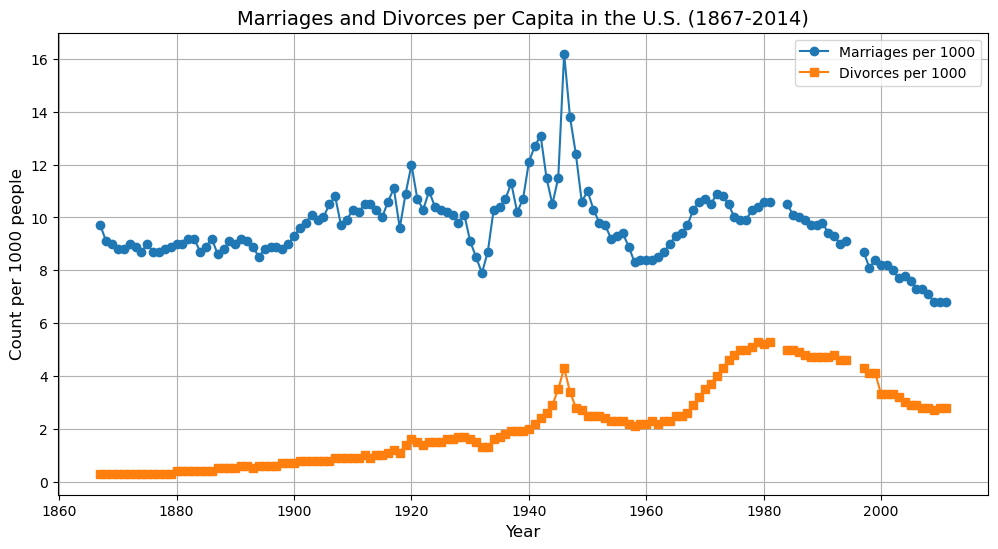

In [69]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset 
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Step 3: Create a line plot for marriages and divorces per capita
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='s')

# Step 4: Add labels, legend, and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count per 1000 people', fontsize=12)
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=14)
plt.legend()
plt.grid(True)

# Step 5: Show the plot
plt.show()

### Question 7

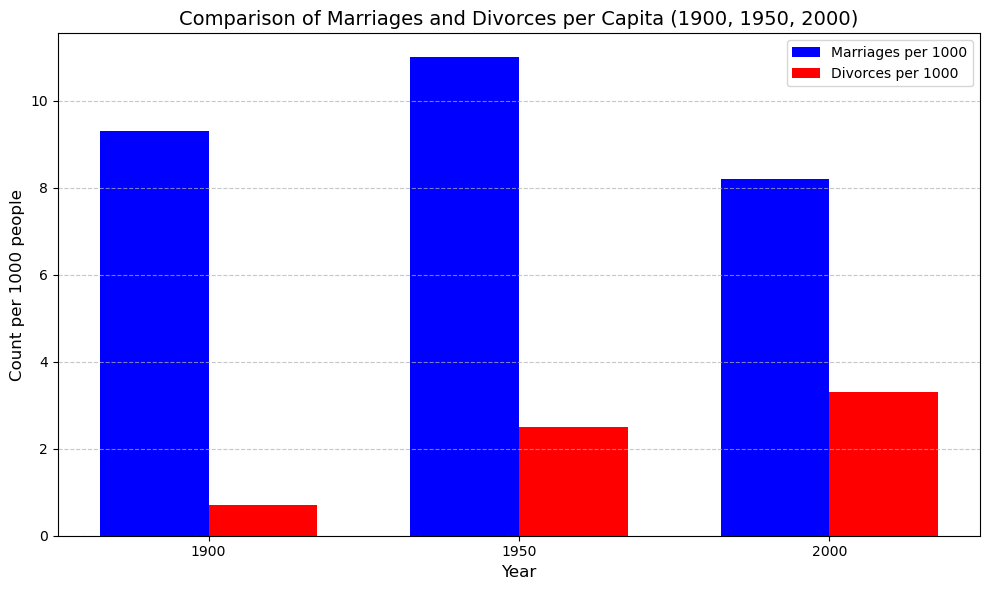

In [72]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Step 3: Filter data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Step 4: Create a vertical bar chart
x = filtered_data['Year']
marriages = filtered_data['Marriages_per_1000']
divorces = filtered_data['Divorces_per_1000']

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Positions for bars
x_indexes = range(len(x))

# Create bars
plt.bar(x_indexes, marriages, width=bar_width, label='Marriages per 1000', color='blue')
plt.bar([i + bar_width for i in x_indexes], divorces, width=bar_width, label='Divorces per 1000', color='red')

# Step 5: Add labels, legend, and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count per 1000 people', fontsize=12)
plt.title('Comparison of Marriages and Divorces per Capita (1900, 1950, 2000)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x_indexes], x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Question 8

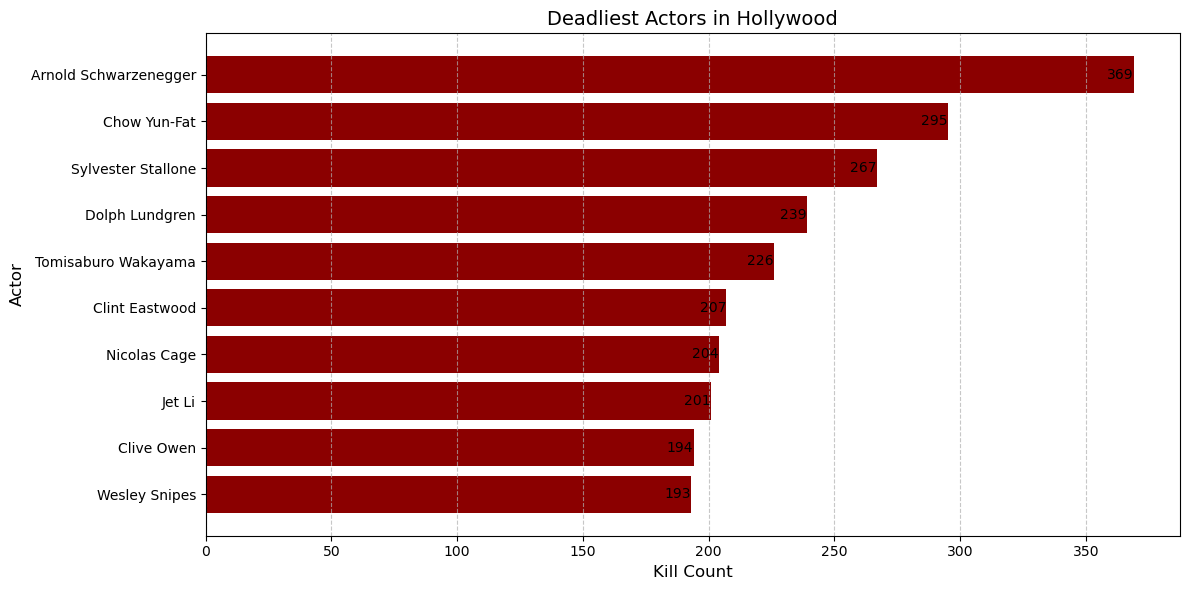

In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\actor_kill_counts.csv'
data = pd.read_csv(file_path)

# Sort the dataset by kill count
data = data.sort_values('Count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(data['Actor'], data['Count'], color='darkred')

# Add labels, title, and grid
plt.xlabel('Kill Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('Deadliest Actors in Hollywood', fontsize=14)
plt.gca().invert_yaxis()  # Invert Y-axis to have the highest kill count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add kill count labels to each bar
for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value), va='center', ha='right', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

### Question 9

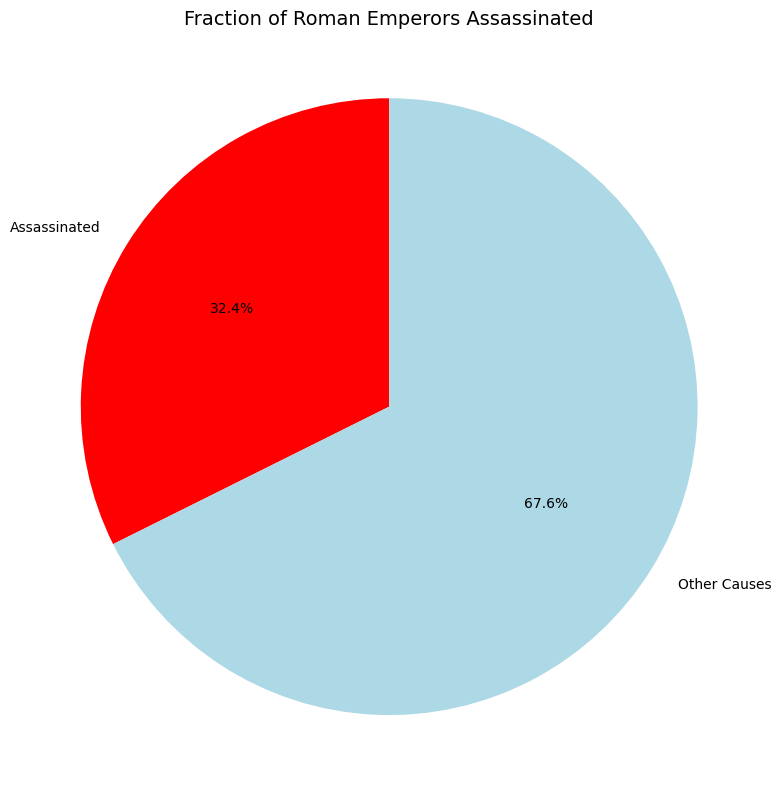

In [80]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

# Step 3: Count the occurrences of each death type
death_counts = data['Cause_of_Death'].value_counts()

# Step 4: Identify the fraction of emperors that were assassinated
assassinated_count = death_counts.get('Assassinated', 0)
total_emperors = data.shape[0]
other_count = total_emperors - assassinated_count

# Create labels and values for the pie chart
labels = ['Assassinated', 'Other Causes']
values = [assassinated_count, other_count]

# Step 5: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightblue'])

# Step 6: Add a title
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)

# Step 7: Display the chart
plt.axis('equal')  # Ensure the pie chart is a circle
plt.tight_layout()
plt.show()

### Question 10

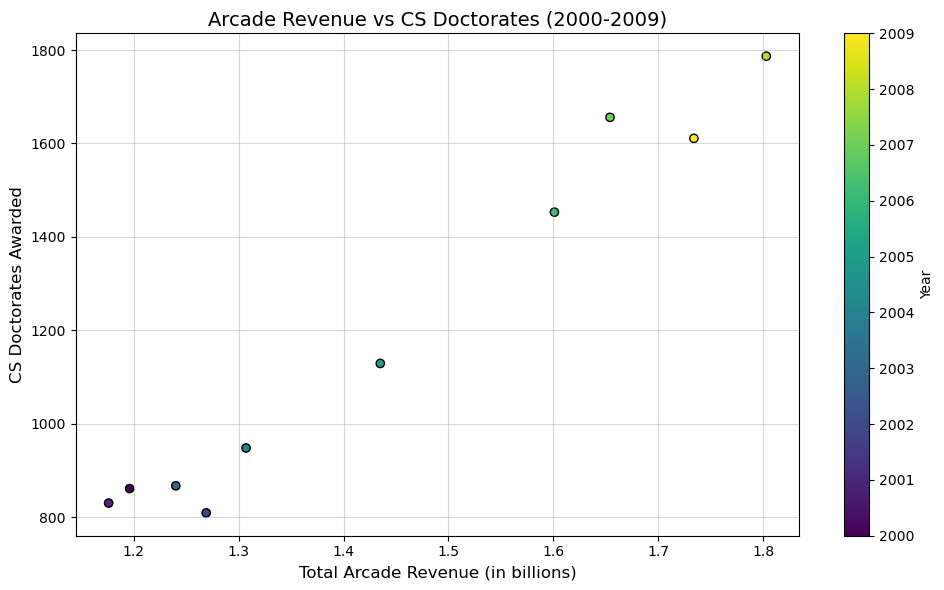

In [83]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = r'C:\Users\thako\OneDrive\Desktop\GEORGIAN COLLEGE\Data Analytics Programming BDAT-1004\Problem_Set_3\arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'], 
    data['Computer Science Doctorates Awarded (US)'], 
    c=data['Year'], 
    cmap='viridis', 
    edgecolor='k'
)

# Step 4: Add colorbar, labels, and title
plt.colorbar(scatter, label='Year')
plt.xlabel('Total Arcade Revenue (in billions)', fontsize=12)
plt.ylabel('CS Doctorates Awarded', fontsize=12)
plt.title('Arcade Revenue vs CS Doctorates (2000-2009)', fontsize=14)
plt.grid(alpha=0.5)

# Step 5: Show the plot
plt.tight_layout()
plt.show()